In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fs = 10
plt.rcParams["font.size"] = fs
plt.rcParams["axes.titlesize"] = plt.rcParams["font.size"]
plt.rcParams["lines.linewidth"] = 0

def cm2inch(x,y): return [x/2.54, y/2.54]

In [6]:
D = pd.read_csv("../result/test2.csv")

In [7]:
D

,m,ex5_2_-7_est,ex5_2_-7_err,ex5_2_-14_est,ex5_2_-14_err,ex5_5_-7_est,ex5_5_-7_err,ex5_5_-14_est,ex5_5_-14_err,ex5_8_-7_est,...,pores_1_2_-14_est,pores_1_2_-14_err,pores_1_5_-7_est,pores_1_5_-7_err,pores_1_5_-14_est,pores_1_5_-14_err,pores_1_8_-7_est,pores_1_8_-7_err,pores_1_8_-14_est,pores_1_8_-14_err
0,8,NaN,3.748201e-01,NaN,3.769352e-01,NaN,4.728002e-01,NaN,4.525443e-01,NaN,...,NaN,2.039589e-02,NaN,8.894076e-02,NaN,6.649026e-02,NaN,1.400125e-01,NaN,7.979676e-02
1,15,3.100390e-01,6.478106e-02,2.961510e-01,8.715492e-02,5.108471e-01,4.558924e-02,4.325816e-01,4.379667e-02,3.561797e-01,...,2.262828e-02,2.839678e-03,9.558755e-02,7.788762e-03,6.506820e-02,1.936636e-02,1.617375e-01,2.188030e-02,1.166730e-01,4.027456e-02
2,29,6.282274e-02,1.958326e-03,9.207736e-02,4.922438e-03,4.573119e-02,9.311700e-04,4.477865e-02,5.481605e-03,2.449742e-02,...,2.811541e-03,1.019270e-04,7.814078e-03,2.837678e-05,1.962831e-02,2.956506e-04,2.207289e-02,2.052442e-04,3.942177e-02,8.574217e-04
3,57,1.957865e-03,1.047129e-06,4.914516e-03,8.434749e-06,9.308345e-04,5.127876e-07,5.488857e-03,7.252408e-06,9.866265e-04,...,1.019666e-04,4.105110e-08,2.836302e-05,1.486365e-08,2.956841e-04,3.381028e-08,2.052792e-04,4.627058e-08,8.577719e-04,3.507373e-07
4,113,1.088177e-06,4.498325e-08,8.434746e-06,3.259925e-11,4.747172e-07,4.167707e-08,7.252397e-06,1.102941e-11,3.102202e-07,...,4.105110e-08,4.317433e-15,6.035273e-09,8.975089e-09,3.381027e-08,6.784502e-15,1.338470e-08,3.321931e-08,3.507372e-07,3.047295e-14
5,225,4.649389e-09,4.033386e-08,3.259483e-11,4.426669e-15,3.115251e-09,3.856182e-08,1.103370e-11,4.291775e-15,2.465005e-09,...,4.507319e-15,2.466008e-16,NaN,NaN,5.980370e-15,9.343350e-16,NaN,NaN,3.216576e-14,2.339304e-15
6,449,NaN,NaN,5.336147e-16,3.903566e-15,NaN,NaN,4.334536e-16,3.869215e-15,NaN,...,2.562931e-17,2.295479e-16,NaN,NaN,1.007514e-16,8.360185e-16,NaN,NaN,3.254465e-16,1.993409e-15
7,897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


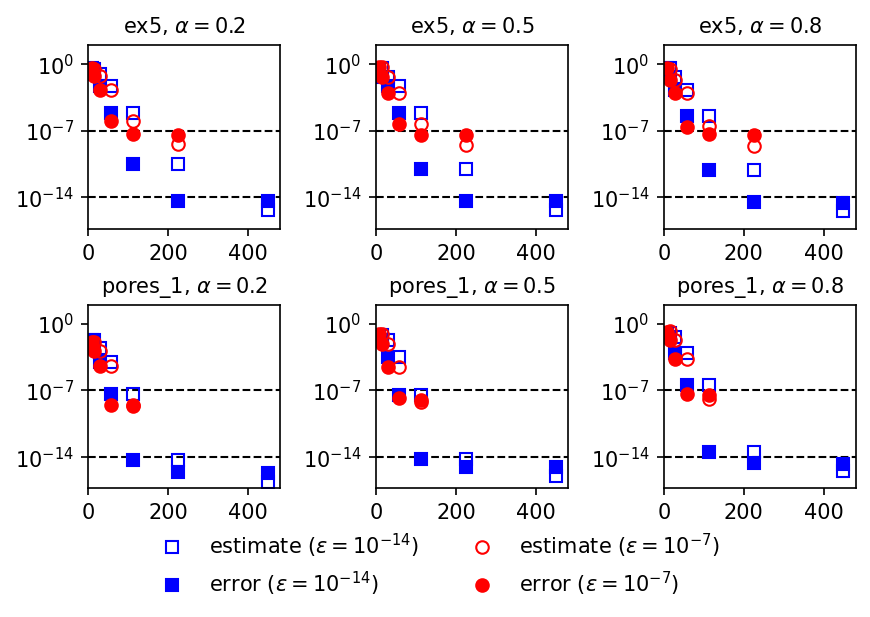

In [8]:
fig, ax = plt.subplots(2, 3, figsize=cm2inch(15, 10.5), dpi=150)

for i, matname in enumerate(["ex5", "pores_1"]):
    for j, αx10 in enumerate([2, 5, 8]):
        m = D["m"]
        y1 = D["%s_%d_-14_est" % (matname, αx10)]
        y2 = D["%s_%d_-14_err" % (matname, αx10)]
        y3 = D["%s_%d_-7_est" % (matname, αx10)]
        y4 = D["%s_%d_-7_err" % (matname, αx10)]
        
        p1, = ax[i][j].plot(m, y1, marker="s", markeredgecolor="b", markerfacecolor="None")
        p2, = ax[i][j].plot(m, y2, marker="s", markeredgecolor="b", markerfacecolor="b")
        p3, = ax[i][j].plot(m, y3, marker="o", markeredgecolor="r", markerfacecolor="None")
        p4, = ax[i][j].plot(m, y4, marker="o", markeredgecolor="r", markerfacecolor="r")
        
        ax[i][j].plot([0,np.max(m)], [1e-7, 1e-7], c="k", ls="--", lw=1, zorder=-10)
        ax[i][j].plot([0,np.max(m)], [1e-14, 1e-14], c="k", ls="--", lw=1, zorder=-10)
        ax[i][j].set_yscale("log")
        ax[i][j].set_title("%s, $\\alpha = 0.%d$" % (matname, αx10))
        ax[i][j].set_ylim(5e-18,1e2)
        ax[i][j].set_yticks([1e-14, 1e-7, 1e0])
        ax[i][j].set_xticks([0, 200, 400])
        ax[i][j].set_xlim(0, 480)
        
   
fig.tight_layout()
labels = []
for log10ϵ in [-14, -7]:
    for s in ["estimate", "error"]:
        labels.append("%s $(\\epsilon=10^{%d})$" % (s, log10ϵ))
    
fig.legend((p1, p2, p3, p4), labels,
           loc=8, ncol=2, frameon=False)

plt.subplots_adjust(bottom=0.2)
plt.savefig("fig-test2.pdf")
plt.show()